In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
held_out_B_data = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")
training_data = pd.read_json("../../data/training_set.json")
validation_data = pd.read_json("../../data/validation_set.json")

In [3]:
held_out_B_data

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,dft_energy,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom,idx,predicted_dft_e_hull
0,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998128,"{'@module': 'pymatgen.core.structure', '@class...",423959398,"{'@module': 'pymatgen.core.structure', '@class...",123103556,-265.489796,-6.637245,0.074200,-1.389153,"{'@module': 'pymatgen.core.structure', '@class...",-266.711243,-6.667781,0,0.077370
1,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998125,"{'@module': 'pymatgen.core.structure', '@class...",421466237,"{'@module': 'pymatgen.core.structure', '@class...",122979400,-265.627054,-6.640676,0.070768,-1.420044,"{'@module': 'pymatgen.core.structure', '@class...",-266.456848,-6.661421,1,0.076950
2,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998126,"{'@module': 'pymatgen.core.structure', '@class...",421466235,"{'@module': 'pymatgen.core.structure', '@class...",122979657,-265.542706,-6.638568,0.072877,-1.424778,"{'@module': 'pymatgen.core.structure', '@class...",-266.213867,-6.655347,2,0.076547
3,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998127,"{'@module': 'pymatgen.core.structure', '@class...",421466263,"{'@module': 'pymatgen.core.structure', '@class...",122979417,-265.631202,-6.640780,0.070665,-1.404994,"{'@module': 'pymatgen.core.structure', '@class...",-264.671021,-6.616776,3,0.077123
4,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998129,"{'@module': 'pymatgen.core.structure', '@class...",421466289,"{'@module': 'pymatgen.core.structure', '@class...",122979438,-265.628562,-6.640714,0.070731,-1.381979,"{'@module': 'pymatgen.core.structure', '@class...",-266.308624,-6.657716,4,0.077057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062436,"{'@module': 'pymatgen.core.structure', '@class...",421446419,"{'@module': 'pymatgen.core.structure', '@class...",122979607,-291.947011,-7.298675,0.083433,-1.855526,"{'@module': 'pymatgen.core.structure', '@class...",-289.953644,-7.248841,595,0.100901
596,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062439,"{'@module': 'pymatgen.core.structure', '@class...",421459053,"{'@module': 'pymatgen.core.structure', '@class...",122979241,-293.275698,-7.331892,0.050215,-1.358484,"{'@module': 'pymatgen.core.structure', '@class...",-290.115479,-7.252887,596,0.078920
597,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062435,"{'@module': 'pymatgen.core.structure', '@class...",421464614,"{'@module': 'pymatgen.core.structure', '@class...",122979281,-291.822920,-7.295573,0.086535,-1.938487,"{'@module': 'pymatgen.core.structure', '@class...",-291.638702,-7.290968,597,0.100350
598,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062438,"{'@module': 'pymatgen.core.structure', '@class...",421446230,"{'@module': 'pymatgen.core.structure', '@class...",122979130,-292.317225,-7.307931,0.074177,-1.890348,"{'@module': 'pymatgen.core.structure', '@class...",-292.125397,-7.303135,598,0.089636


In [4]:
from pymatgen.core import Structure


def check_if_layered(struct,B_elements):
    struct = Structure.from_dict(struct)
    
    for i in range(len(struct.species)):
        if str(struct.species[i]) in B_elements:
            count_NN = 0
            count_Next_NN = 0
            for j in range(len(struct)):
                diff = struct[i].coords - struct[j].coords
                dist = np.sqrt(np.sum(diff*diff))
                if struct.species[j]==struct.species[i]:
                    if abs(dist-4.0)<0.01:
                        count_NN+=1
                    elif abs(dist-5.6568)<0.01:
                        count_Next_NN +=1
                        
            if count_NN != 2 or count_Next_NN != 1:
                return False
                
    return True

def get_is_layered(df):
    is_layered = []
    
    for i in range(len(df)):
        is_layered.append(check_if_layered(df.iloc[i]["unrelaxed_struct"],df.iloc[i].composition["sites"]["B"]))
    
    return is_layered


def check_if_rocksalt(struct,B_elements):
    struct = Structure.from_dict(struct)
    
    for i in range(len(struct.species)):
        if str(struct.species[i]) in B_elements:
            for j in range(len(struct)):
                diff = struct[i].coords - struct[j].coords
                dist = np.sqrt(np.sum(diff*diff))
                if abs(dist-4.0)<0.1 and struct.species[j]==struct.species[i]:
                    return False
                
    return True

def get_is_rocksalt(df):
    is_rocksalt = []
    
    for i in range(len(df)):
        is_rocksalt.append(check_if_rocksalt(df.iloc[i]["unrelaxed_struct"],df.iloc[i].composition["sites"]["B"]))
    
    return is_rocksalt



/home/jypeng/miniconda3/envs/Perovskite_ML_Environment/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
is_layered = get_is_layered(held_out_B_data)

In [6]:
is_rocksalt = get_is_rocksalt(held_out_B_data)

In [7]:
held_out_B_data["is_layered"] = is_layered 

held_out_B_data["is_rocksalt"] = is_rocksalt

In [8]:
held_out_B_data.iloc[1].unrelaxed_cryst

AttributeError: 'Series' object has no attribute 'unrelaxed_cryst'

In [12]:
test_struct = Structure.from_dict(held_out_B_data.iloc[1].opt_struct)

from pymatgen.analysis.local_env import CrystalNN
cnn = CrystalNN() # using default params


In [13]:
info = cnn.get_nn_info(test_struct, 0)

/home/jypeng/miniconda3/envs/Perovskite_ML_Environment/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4155: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn(
/home/jypeng/miniconda3/envs/Perovskite_ML_Environment/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:3949: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  warnings.warn(


In [14]:
info

[{'site': PeriodicSite: O (-0.0168, 6.0841, -1.7216) [-0.0018, 0.7974, -0.2207],
  'image': (-1, 0, -1),
  'weight': 1,
  'site_index': 26},
 {'site': PeriodicSite: O (-1.5904, 9.1982, -0.0722) [-0.2080, 1.2077, -0.0012],
  'image': (-1, 1, 0),
  'weight': 1,
  'site_index': 28},
 {'site': PeriodicSite: O (1.6006, 9.2367, -0.0657) [0.2104, 1.2129, -0.0005],
  'image': (0, 1, 0),
  'weight': 1,
  'site_index': 16},
 {'site': PeriodicSite: O (-0.0149, 5.4797, 1.5018) [-0.0017, 0.7209, 0.2021],
  'image': (-1, 0, 0),
  'weight': 1,
  'site_index': 23},
 {'site': PeriodicSite: O (1.6029, 7.6022, 2.1334) [0.2105, 1.0002, 0.2868],
  'image': (0, 1, 0),
  'weight': 1,
  'site_index': 18},
 {'site': PeriodicSite: O (-1.5913, 7.6071, 2.1701) [-0.2084, 1.0007, 0.2919],
  'image': (-1, 1, 0),
  'weight': 1,
  'site_index': 30},
 {'site': PeriodicSite: O (-2.2178, 6.0322, -0.0379) [-0.2905, 0.7919, 0.0005],
  'image': (-1, 0, 0),
  'weight': 1,
  'site_index': 34},
 {'site': PeriodicSite: O (2.219

In [15]:
nns = test_struct.get_neighbors(test_struct[0],4.0)

In [16]:
Avec = test_struct[0].coords

In [17]:
Bvec = nns[0].coords

In [18]:
Avec-Bvec

array([3.65364689e-03, 4.91433788e-02, 3.88115017e+00])

In [19]:
str(nns[0].species)

'Ca1'

In [20]:
for site in test_struct:
    print(str(site.species)[:-1])
    print(site)
    print(site.get_neighbors(4.0))

Ca
[4.59656694e-03 7.48399390e+00 1.52458407e-01] Ca


AttributeError: get_neighbors

In [21]:
rocksalt_center = []
layered_center = []
rocksalt_center_2 = []
layered_center_2 = []
comp = []

def get_center(struct,A,Bs):
    
    total_0 = []
    total_1 = []
    
    for site in struct:
        if str(site.species)[:-1] == A:
            nns = struct.get_neighbors(site,4.0)
            for neighbor in nns:
                if str(neighbor.species)[:-1]==Bs[0]:
                    total_0.append(neighbor[1])
                elif str(neighbor.species)[:-1]==Bs[1]:
                    total_1.append(neighbor[1])
    std_dev = np.std(total_0+total_1)
    total_0 = np.asarray(total_0)
    total_1 = np.asarray(total_1)
    
    return np.abs(np.mean(total_0)-np.mean(total_1)),std_dev

for i in range(len(held_out_B_data)):
    if held_out_B_data.iloc[i].is_layered:
        struct = Structure.from_dict(held_out_B_data.iloc[i].opt_struct)
        A = held_out_B_data.iloc[i].composition["sites"]["A"][0]
        Bs = held_out_B_data.iloc[i].composition["sites"]["B"]
        layered_center.append(get_center(struct,A,Bs)[0])
        layered_center_2.append(get_center(struct,A,Bs)[1])
    if held_out_B_data.iloc[i].is_rocksalt:
        struct = Structure.from_dict(held_out_B_data.iloc[i].opt_struct)
        A = held_out_B_data.iloc[i].composition["sites"]["A"][0]
        Bs = held_out_B_data.iloc[i].composition["sites"]["B"]
        rocksalt_center.append(get_center(struct,A,Bs)[0])
        rocksalt_center_2.append(get_center(struct,A,Bs)[1])
        comp.append(held_out_B_data.iloc[i].formula)
        
rocksalt_center = np.asarray(rocksalt_center)
layered_center = np.asarray(layered_center)

In [22]:
np.mean(rocksalt_center_2)

0.11807225476020099

In [23]:
np.mean(layered_center_2)

0.16943607576398773

In [24]:
np.mean(rocksalt_center)

0.00015557839226371329

In [25]:
np.mean(layered_center)

0.18348667672190913

In [26]:
rocksalt_JT = []
layered_JT = []
comp = []

def get_JT(struct,A,Bs):
    
    total_0 = []
    total_1 = []
    
    for site in struct:
        if str(site.species)[:-1] == Bs[0]:
            nns = struct.get_neighbors(site,4.0)
            for neighbor in nns:
                if str(neighbor.species)[:-1]==A:
                    total_0.append(neighbor[1])
                
        elif str(site.species)[:-1] == Bs[1]:
            nns = struct.get_neighbors(site,4.0)
            for neighbor in nns:
                if str(neighbor.species)[:-1]==A:
                    total_1.append(neighbor[1])
    total_0 = np.asarray(total_0)
    total_1 = np.asarray(total_1)
    return (total_0.max()-total_0.min(),total_1.max()-total_1.min())

for i in range(len(held_out_B_data)):
    if held_out_B_data.iloc[i].is_layered:
        struct = Structure.from_dict(held_out_B_data.iloc[i].opt_struct)
        A = held_out_B_data.iloc[i].composition["sites"]["A"][0]
        Bs = held_out_B_data.iloc[i].composition["sites"]["B"]
        JT_1,JT_2 = get_JT(struct,A,Bs)
        layered_JT.append(JT_1)
        layered_JT.append(JT_2)
        
    if held_out_B_data.iloc[i].is_rocksalt:
        struct = Structure.from_dict(held_out_B_data.iloc[i].opt_struct)
        A = held_out_B_data.iloc[i].composition["sites"]["A"][0]
        Bs = held_out_B_data.iloc[i].composition["sites"]["B"]
        JT_1,JT_2 = get_JT(struct,A,Bs)
        rocksalt_JT.append(JT_1)
        rocksalt_JT.append(JT_2)
        comp.append(held_out_B_data.iloc[i].formula)
        
rocksalt_JT = np.asarray(rocksalt_JT)
layered_JT = np.asarray(layered_JT)

In [27]:
rocksalt_volume = []
layered_volume = []
comp = []

from scipy.spatial import ConvexHull

def get_vol(struct,A,Bs):
    
    total_0 = []
    total_1 = []
    
    for site in struct:
        if str(site.species)[:-1] == Bs[0]:
            ### 
            
            points = []
            
            nns = struct.get_neighbors(site,4.0)
            for neighbor in nns:
                if str(neighbor.species)[:-1]=="O":
                    vec = neighbor.coords -site.coords 
                    points.append(vec)
            
            chull = ConvexHull(points)
            
            total_0.append(chull.volume)
                
        elif str(site.species)[:-1] == Bs[1]:
            points = []
            
            nns = struct.get_neighbors(site,4.0)
            for neighbor in nns:
                if str(neighbor.species)[:-1]=="O":
                    vec = neighbor.coords - site.coords
                    points.append(vec)
                  
            chull = ConvexHull(points)
            total_1.append(chull.volume)
    total_0 = np.asarray(total_0).mean()
    total_1 = np.asarray(total_1).mean()
    
    return abs(total_0-total_1)

for i in range(len(held_out_B_data)):
    if held_out_B_data.iloc[i].is_layered:
        struct = Structure.from_dict(held_out_B_data.iloc[i].opt_struct)
        A = held_out_B_data.iloc[i].composition["sites"]["A"][0]
        Bs = held_out_B_data.iloc[i].composition["sites"]["B"]
        layered_volume.append(get_vol(struct,A,Bs))

        
    if held_out_B_data.iloc[i].is_rocksalt:
        struct = Structure.from_dict(held_out_B_data.iloc[i].opt_struct)
        A = held_out_B_data.iloc[i].composition["sites"]["A"][0]
        Bs = held_out_B_data.iloc[i].composition["sites"]["B"]
        rocksalt_volume.append(get_vol(struct,A,Bs))

        comp.append(held_out_B_data.iloc[i].formula)
        
rocksalt_volume = np.asarray(rocksalt_volume)
layered_volume = np.asarray(layered_volume)

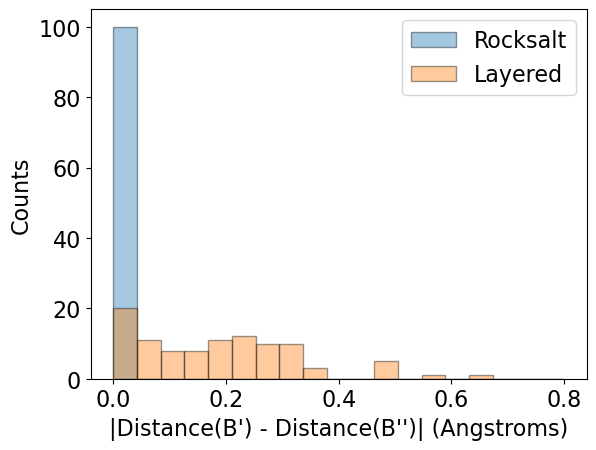

In [28]:
bins = np.linspace(0,0.8,20)

plt.hist(rocksalt_center,alpha=0.4,bins=bins,edgecolor="black",label="Rocksalt")
plt.hist(layered_center,alpha=0.4,bins=bins,edgecolor="black",label="Layered")

plt.legend(fontsize=16)

plt.ylabel("Counts",size=16)
plt.yticks([0,20,40,60,80,100],size=16)

plt.xticks([0.0,0.2,0.4,0.6,0.8],size=16)
plt.xlabel("|Distance(B') - Distance(B'')| (Angstroms)",size=16)
plt.savefig("Distortion_Example.pdf",bbox_inches="tight")

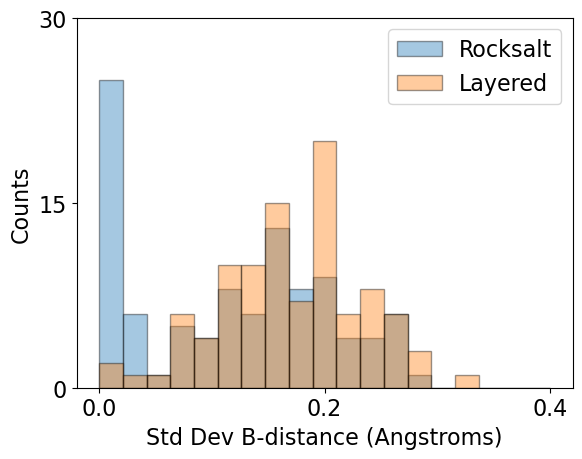

In [29]:
bins = np.linspace(0,0.4,20)

plt.hist(rocksalt_center_2,alpha=0.4,bins=bins,edgecolor="black",label="Rocksalt")
plt.hist(layered_center_2,alpha=0.4,bins=bins,edgecolor="black",label="Layered")

plt.legend(fontsize=16)

plt.ylabel("Counts",size=16)
plt.yticks([0,15,30],size=16)

plt.xticks([0.0,0.2,0.4],size=16)
plt.xlabel("Std Dev B-distance (Angstroms)",size=16)
plt.savefig("Distortion_Center_2.pdf",bbox_inches="tight")

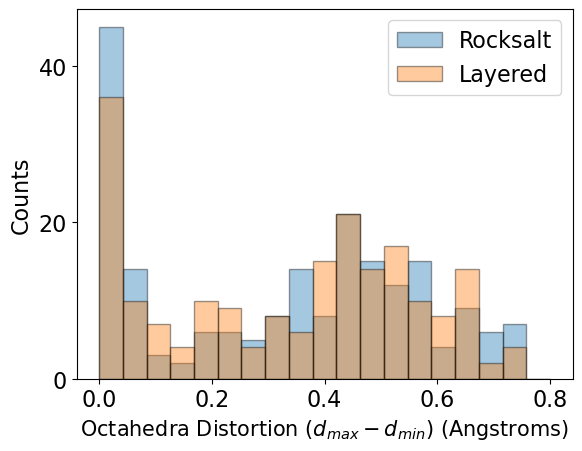

In [31]:
bins = np.linspace(0,0.8,20)

plt.hist(rocksalt_JT,alpha=0.4,bins=bins,edgecolor="black",label="Rocksalt")
plt.hist(layered_JT,alpha=0.4,bins=bins,edgecolor="black",label="Layered")

plt.legend(fontsize=16)

plt.ylabel("Counts",size=16)
plt.yticks([0,20,40],size=16)

plt.xticks([0.0,0.2,0.4,0.6,0.8],size=16)
plt.xlabel("Octahedra Distortion ($d_{max}-d_{min}$) (Angstroms)",size=15)
plt.savefig("Distortion_Example_Octa.pdf",bbox_inches="tight")

In [110]:
layered_volume

array([3.73076839e-03, 9.59265629e-02, 1.92054542e+01, 1.29326330e+01,
       1.26908739e+01, 1.29898027e+01, 1.27754219e+01, 1.35230120e+01,
       1.04065615e+01, 7.64544996e+00, 3.40654361e+00, 1.93495818e+01,
       1.63944167e+01, 1.16087059e+01, 1.29957899e+01, 1.68676815e+00,
       4.17982701e-01, 1.06380462e+01, 4.90453390e+00, 4.26676799e+00,
       9.82902608e+00, 1.41090275e+01, 3.89038287e+00, 1.01053025e+01,
       2.25209323e+01, 1.63167983e+01, 7.80301403e+00, 1.29447341e+01,
       2.86048329e+01, 8.22433998e+00, 3.33365052e+01, 1.30503288e+01,
       3.26535068e+00, 7.19318628e+00, 1.75154423e+00, 1.22489685e+01,
       2.43567458e+00, 7.44779684e+00, 1.24079019e+01, 2.88844539e+01,
       8.73129660e+00, 2.62369400e+00, 1.70611622e+01, 1.48267688e+00,
       6.78474353e-01, 4.23979542e+00, 8.39677420e+00, 9.15257783e+00,
       1.76414169e-01, 2.06651954e+00, 4.41269326e+00, 1.35946486e+01,
       2.76441265e+00, 1.56519394e+01, 3.97232931e+01, 2.03341198e+01,
      

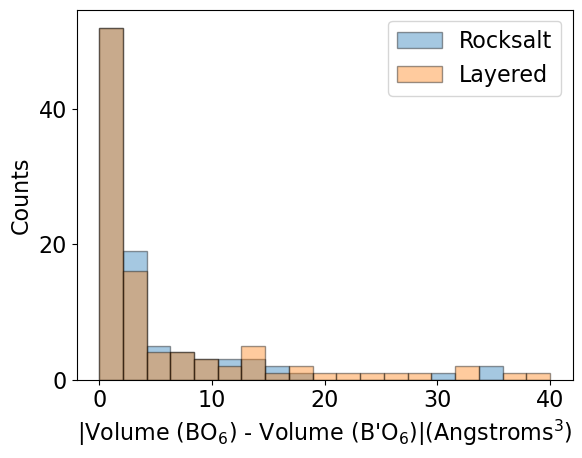

In [121]:
bins = np.linspace(0,40.0,20)

plt.hist(rocksalt_volume,alpha=0.4,bins=bins,edgecolor="black",label="Rocksalt")
plt.hist(layered_volume,alpha=0.4,bins=bins,edgecolor="black",label="Layered")

plt.legend(fontsize=16)

plt.ylabel("Counts",size=16)
plt.yticks([0,20,40],size=16)

plt.xticks([0.0,10,20,30,40],size=16)
plt.xlabel("|Volume (BO$_{6}$) - Volume (B'O$_{6}$)|(Angstroms$^3$)",size=16)
plt.savefig("Distortion_Example_Volume.pdf",bbox_inches="tight")

In [80]:
np.argsort(layered_center)

array([ 0, 27, 64,  1, 48, 16, 57, 66, 44, 68, 54, 85, 96, 72, 77, 47, 67,
       15, 34, 52, 49, 36, 41, 10, 32, 65, 22, 55, 50, 45, 19, 18, 75, 99,
       84, 83, 43,  9, 33, 37, 87, 26, 94, 74, 62, 29, 46, 20, 40, 89,  8,
       70, 23, 81, 60, 79, 38, 17, 56, 13, 82,  3,  4, 31,  5,  6, 51, 97,
       95, 71, 73, 14,  7, 69, 35, 61, 21, 63, 80, 53, 25, 92, 59, 58, 86,
       42, 88, 12,  2, 76, 90, 93, 11, 39, 78, 91, 24, 28, 30, 98])

In [85]:
comp[24]

'Cu4O24Os4Sr8'

In [56]:
rocksalt_tetra = []
layered_tetra = []

def get_tetra(struct):
    cell = struct.lattice
    #print(cell.a)
    #print(cell.b)
    #print(cell.c)
    return max([cell.a,cell.b,cell.c])-np.mean([cell.a,cell.b,cell.c])

for i in range(len(held_out_B_data)):
    if held_out_B_data.iloc[i].is_layered:
        struct = Structure.from_dict(held_out_B_data.iloc[i].opt_struct)
        layered_tetra.append(get_tetra(struct))
    if held_out_B_data.iloc[i].is_rocksalt:
        struct = Structure.from_dict(held_out_B_data.iloc[i].opt_struct)
        rocksalt_tetra.append(get_tetra(struct))

In [57]:
rocksalt_tetra = np.asarray(rocksalt_tetra)
layered_tetra = np.asarray(layered_tetra)

In [58]:
rocksalt_tetra

array([1.50798629e-02, 2.86223778e-01, 1.88533313e-02, 3.21170303e-04,
       2.24208410e-03, 9.66858807e-04, 1.41339229e-04, 4.23403877e-03,
       3.31473745e-02, 1.93894001e-02, 1.15946108e-02, 6.96493497e-03,
       6.13455997e-02, 1.41464732e-02, 3.74019504e-01, 1.74010231e-02,
       6.27831465e-03, 1.54193987e-01, 1.67349691e-02, 1.20467326e-02,
       2.37875917e-02, 6.08785807e-02, 3.91302128e-01, 4.51395910e-02,
       4.69672581e-01, 1.20870536e-02, 4.50692922e-02, 4.87549508e-03,
       1.44715079e-02, 1.48951006e-02, 9.10522546e-03, 4.18417541e-03,
       1.65034227e-02, 1.90622792e-02, 1.73405841e-02, 6.80970912e-02,
       5.89750928e-02, 2.43099999e-05, 6.94699833e-05, 9.79179870e-05,
       7.50476076e-02, 2.61916011e-02, 3.75115099e-02, 7.76737062e-03,
       5.21337299e-04, 7.73189537e-02, 6.66049337e-03, 1.15421962e-03,
       8.90553250e-02, 2.96844586e-01, 2.30867617e-02, 5.72936483e-03,
       1.41244524e-02, 4.80619682e-02, 0.00000000e+00, 1.34317089e-03,
      

In [59]:
rocksalt_tetra.mean()

0.08013236574763848

In [60]:
layered_tetra.mean()

0.1568396662434356

In [61]:
import matplotlib.pyplot as plt

(array([21.,  7., 15.,  8.,  2.,  8.,  5.,  3.,  7.,  4.,  1.,  4.,  3.,
         2.,  0.,  0.,  1.,  2.,  1.,  2.,  0.,  2.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.]),
 array([2.86710788e-04, 2.55273526e-02, 5.07679945e-02, 7.60086363e-02,
        1.01249278e-01, 1.26489920e-01, 1.51730562e-01, 1.76971204e-01,
        2.02211846e-01, 2.27452487e-01, 2.52693129e-01, 2.77933771e-01,
        3.03174413e-01, 3.28415055e-01, 3.53655697e-01, 3.78896338e-01,
        4.04136980e-01, 4.29377622e-01, 4.54618264e-01, 4.79858906e-01,
        5.05099548e-01, 5.30340190e-01, 5.55580831e-01, 5.80821473e-01,
        6.06062115e-01, 6.31302757e-01, 6.56543399e-01, 6.81784041e-01,
        7.07024682e-01, 7.32265324e-01, 7.57505966e-01]),
 <BarContainer object of 30 artists>)

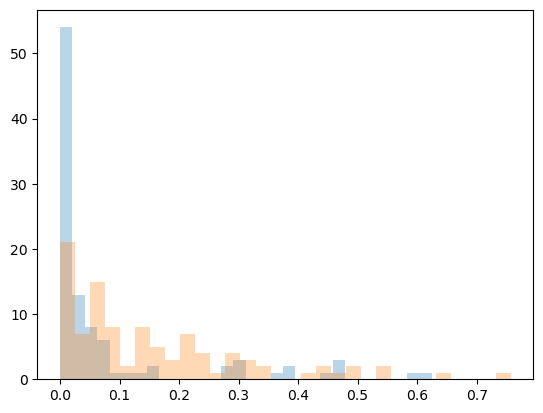

In [64]:
plt.hist(rocksalt_tetra,alpha=0.3,bins=30)
plt.hist(layered_tetra,alpha=0.3,bins=30)

In [6]:
#Ba8Bi4Sb4O24

In [9]:
form = "Ba8Bi4O24Sb4"

In [10]:
form in held_out_B_data.formula

False

In [18]:
list(held_out_B_data.formula)

['Ca8Fe4Mn4O24',
 'Ca8Fe4Mn4O24',
 'Ca8Fe4Mn4O24',
 'Ca8Fe4Mn4O24',
 'Ca8Fe4Mn4O24',
 'Ca8Fe4Mn4O24',
 'Cr4Mn4O24Pr8',
 'Cr4Mn4O24Pr8',
 'Cr4Mn4O24Pr8',
 'Cr4Mn4O24Pr8',
 'Cr4Mn4O24Pr8',
 'Cr4Mn4O24Pr8',
 'Cr4Ni4O24Sr8',
 'Cr4Ni4O24Sr8',
 'Cr4Ni4O24Sr8',
 'Cr4Ni4O24Sr8',
 'Cr4Ni4O24Sr8',
 'Cr4Ni4O24Sr8',
 'Ba8Fe4Nb4O24',
 'Ba8Fe4Nb4O24',
 'Ba8Fe4Nb4O24',
 'Ba8Fe4Nb4O24',
 'Ba8Fe4Nb4O24',
 'Ba8Fe4Nb4O24',
 'Ba8Fe4O24Ta4',
 'Ba8Fe4O24Ta4',
 'Ba8Fe4O24Ta4',
 'Ba8Fe4O24Ta4',
 'Ba8Fe4O24Ta4',
 'Ba8Fe4O24Ta4',
 'Ba8Ga4Nb4O24',
 'Ba8Ga4Nb4O24',
 'Ba8Ga4Nb4O24',
 'Ba8Ga4Nb4O24',
 'Ba8Ga4Nb4O24',
 'Ba8Ga4Nb4O24',
 'Ba8Ga4O24Ta4',
 'Ba8Ga4O24Ta4',
 'Ba8Ga4O24Ta4',
 'Ba8Ga4O24Ta4',
 'Ba8Ga4O24Ta4',
 'Ba8Ga4O24Ta4',
 'Ba8Mn4O24Re4',
 'Ba8Mn4O24Re4',
 'Ba8Mn4O24Re4',
 'Ba8Mn4O24Re4',
 'Ba8Mn4O24Re4',
 'Ba8Mn4O24Re4',
 'Ba8Nb4O24V4',
 'Ba8Nb4O24V4',
 'Ba8Nb4O24V4',
 'Ba8Nb4O24V4',
 'Ba8Nb4O24V4',
 'Ba8Nb4O24V4',
 'Ba8Nb4O24Y4',
 'Ba8Nb4O24Y4',
 'Ba8Nb4O24Y4',
 'Ba8Nb4O24Y4',
 'Ba8Nb4O24Y4',
 'Ba8Nb4

In [11]:
held_out_B_data.formula[0]

'Ca8Fe4Mn4O24'

In [13]:
training_data

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,dft_energy,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom
0,Ba1Ca7Co4Ni4O24,Ba0.125Ca0.875Co0.500Ni0.500O3,"{'sites': {'A': ['Ca', 'Ba'], 'B': ['Ni', 'Co'...",40,40,222996264,"{'@module': 'pymatgen.core.structure', '@class...",423959370,"{'@module': 'pymatgen.core.structure', '@class...",123103535,-224.894145,-5.622354,0.191137,-1.350995,"{'@module': 'pymatgen.core.structure', '@class...",-225.699905,-5.642498
1,Ba1Ca7Co4Ni4O24,Ba0.125Ca0.875Co0.500Ni0.500O3,"{'sites': {'A': ['Ca', 'Ba'], 'B': ['Ni', 'Co'...",40,40,222996266,"{'@module': 'pymatgen.core.structure', '@class...",423959313,"{'@module': 'pymatgen.core.structure', '@class...",123103487,-225.312597,-5.632815,0.180676,-1.460705,"{'@module': 'pymatgen.core.structure', '@class...",-226.764313,-5.669108
2,Ba1Ca7Co4Ni4O24,Ba0.125Ca0.875Co0.500Ni0.500O3,"{'sites': {'A': ['Ca', 'Ba'], 'B': ['Ni', 'Co'...",40,40,222996268,"{'@module': 'pymatgen.core.structure', '@class...",419980889,"{'@module': 'pymatgen.core.structure', '@class...",122914553,-225.118435,-5.627961,0.185530,-1.480508,"{'@module': 'pymatgen.core.structure', '@class...",-226.963242,-5.674081
3,Ba1Ca7Co4Ni4O24,Ba0.125Ca0.875Co0.500Ni0.500O3,"{'sites': {'A': ['Ca', 'Ba'], 'B': ['Ni', 'Co'...",40,40,222996265,"{'@module': 'pymatgen.core.structure', '@class...",419980885,"{'@module': 'pymatgen.core.structure', '@class...",122914549,-224.984354,-5.624609,0.188882,-1.442648,"{'@module': 'pymatgen.core.structure', '@class...",-225.563232,-5.639081
4,Ba1Ca7Co4Ni4O24,Ba0.125Ca0.875Co0.500Ni0.500O3,"{'sites': {'A': ['Ca', 'Ba'], 'B': ['Ni', 'Co'...",40,40,222996267,"{'@module': 'pymatgen.core.structure', '@class...",427514511,"{'@module': 'pymatgen.core.structure', '@class...",123322799,-224.905198,-5.622630,0.190861,-1.387089,"{'@module': 'pymatgen.core.structure', '@class...",-225.639175,-5.640979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,Mn4O24Sc4Tb8,TbMn0.500Sc0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Sc', 'Mn'], 'X'...",40,40,272062440,"{'@module': 'pymatgen.core.structure', '@class...",399911929,"{'@module': 'pymatgen.core.structure', '@class...",119707231,-332.652054,-8.316301,0.053533,-2.344340,"{'@module': 'pymatgen.core.structure', '@class...",-330.206604,-8.255165
3613,Mn4O24Sc4Tb8,TbMn0.500Sc0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Sc', 'Mn'], 'X'...",40,40,272062441,"{'@module': 'pymatgen.core.structure', '@class...",421446375,"{'@module': 'pymatgen.core.structure', '@class...",122979599,-332.489984,-8.312250,0.057585,-2.431318,"{'@module': 'pymatgen.core.structure', '@class...",-328.862915,-8.221573
3614,Mn4O24Sc4Tb8,TbMn0.500Sc0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Sc', 'Mn'], 'X'...",40,40,272062442,"{'@module': 'pymatgen.core.structure', '@class...",399667135,"{'@module': 'pymatgen.core.structure', '@class...",119707164,-332.507380,-8.312684,0.057150,-2.405017,"{'@module': 'pymatgen.core.structure', '@class...",-330.704498,-8.267612
3615,Mn4O24Sc4Tb8,TbMn0.500Sc0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Sc', 'Mn'], 'X'...",40,40,272062443,"{'@module': 'pymatgen.core.structure', '@class...",421467354,"{'@module': 'pymatgen.core.structure', '@class...",122979525,-332.352451,-8.308811,0.061023,-2.434804,"{'@module': 'pymatgen.core.structure', '@class...",-329.915222,-8.247881


In [16]:
form in list(training_data.formula)

False

In [20]:
form in list(validation_data.formula)

True

In [21]:
data_form = validation_data[validation_data.formula==form].copy()
data_form_sorted = data_form.sort_values(by=["unrelaxed_cryst_id"],axis=0)

In [22]:
data_form_sorted

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,dft_energy,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom
1229,Ba8Bi4O24Sb4,BaBi0.500Sb0.500O3,"{'sites': {'A': ['Ba'], 'B': ['Bi', 'Sb'], 'X'...",40,40,261299723,"{'@module': 'pymatgen.core.structure', '@class...",399667134,"{'@module': 'pymatgen.core.structure', '@class...",119707163,-243.505825,-6.087646,0.107637,-2.823344,"{'@module': 'pymatgen.core.structure', '@class...",-243.958237,-6.098956
1230,Ba8Bi4O24Sb4,BaBi0.500Sb0.500O3,"{'sites': {'A': ['Ba'], 'B': ['Bi', 'Sb'], 'X'...",40,40,261299724,"{'@module': 'pymatgen.core.structure', '@class...",399900163,"{'@module': 'pymatgen.core.structure', '@class...",119707225,-245.135314,-6.128383,0.066899,-2.245758,"{'@module': 'pymatgen.core.structure', '@class...",-245.142731,-6.128568
1231,Ba8Bi4O24Sb4,BaBi0.500Sb0.500O3,"{'sites': {'A': ['Ba'], 'B': ['Bi', 'Sb'], 'X'...",40,40,261299725,"{'@module': 'pymatgen.core.structure', '@class...",421466174,"{'@module': 'pymatgen.core.structure', '@class...",122979359,-244.432410,-6.110810,0.084472,-2.732577,"{'@module': 'pymatgen.core.structure', '@class...",-245.029541,-6.125739
1232,Ba8Bi4O24Sb4,BaBi0.500Sb0.500O3,"{'sites': {'A': ['Ba'], 'B': ['Bi', 'Sb'], 'X'...",40,40,261299726,"{'@module': 'pymatgen.core.structure', '@class...",399667133,"{'@module': 'pymatgen.core.structure', '@class...",119707162,-245.461551,-6.136539,0.058744,-2.653920,"{'@module': 'pymatgen.core.structure', '@class...",-245.861435,-6.146536
1233,Ba8Bi4O24Sb4,BaBi0.500Sb0.500O3,"{'sites': {'A': ['Ba'], 'B': ['Bi', 'Sb'], 'X'...",40,40,261299727,"{'@module': 'pymatgen.core.structure', '@class...",399832804,"{'@module': 'pymatgen.core.structure', '@class...",119707207,-245.396346,-6.134909,0.060374,-2.934429,"{'@module': 'pymatgen.core.structure', '@class...",-245.981445,-6.149536
1234,Ba8Bi4O24Sb4,BaBi0.500Sb0.500O3,"{'sites': {'A': ['Ba'], 'B': ['Bi', 'Sb'], 'X'...",40,40,261299728,"{'@module': 'pymatgen.core.structure', '@class...",399849801,"{'@module': 'pymatgen.core.structure', '@class...",119707210,-247.565891,-6.189147,0.006135,-2.083131,"{'@module': 'pymatgen.core.structure', '@class...",-247.424698,-6.185617


In [24]:
is_layered = get_is_layered(data_form_sorted)

In [25]:
is_layered

[True, False, False, False, False, False]

In [26]:
data_form_sorted.iloc[0]

formula                                                                Ba8Bi4O24Sb4
framework                                                        BaBi0.500Sb0.500O3
composition                       {'sites': {'A': ['Ba'], 'B': ['Bi', 'Sb'], 'X'...
n_atoms_unrelaxed                                                                40
n_atoms_opt                                                                      40
unrelaxed_cryst_id                                                        261299723
unrelaxed_struct                  {'@module': 'pymatgen.core.structure', '@class...
opt_cryst_id                                                              399667134
opt_struct                        {'@module': 'pymatgen.core.structure', '@class...
es_job_id                                                                 119707163
dft_energy                                                              -243.505825
dft_energy_per_atom                                                       -6

In [49]:
import json
from pymatgen.io.cif import CifWriter

def save_structs(df):
    
    for i in range(len(df)):
        
        curr_struct = Structure.from_dict(df.iloc[i].opt_struct)
        
        writer = CifWriter(curr_struct)
        file_name = form+"_relaxed_struct_"+str(i)+".cif"
        writer.write_file(file_name)
        
    

In [50]:
save_structs(data_form_sorted)